<a href="https://colab.research.google.com/github/MaraDestefanis/colaborativo_densidad_arg/blob/main/Densidad_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER Ciencia de Datos en la Vida Real.
### Aplicación de Ciencia de Datos en Periodismo

## Primer Paso:
- PRELIMINARES: Instalación de paquetes que voy a necesitar.

In [ ]:
# PRELIMINARES

import os  # módulo incorporado en Python que permite utilizar funcionalidades dependientes del sistema operativo
import numpy as np
import pandas as pd
import requests # HTTP request web
from io import StringIO # tipo de dato string
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import Image
from IPython.display import display, Image, clear_output


 Librería Numpy: Principal librería en Python y ampliamente usada cs de datos:

    Soporte para arreglos y matrices multidimensionales. (ndarray)
    funciones matemáticas.
    Indexación y segmentación.
    Transmisión(broadcasting)

Librería Pandas: Manipulación y análisis de datos en Python Podemos pensar de ella como una versión poderosa de excel con más herramientas.

    Manipulación de datos
    Indexación y selección
    Operaciones y cálculos
    Limpieza y preparación de datos
    Visualización de datos



SEGUNDO PASO:

    RAW DATA COLECTED: CAPTURA DE DATOS



In [ ]:
# Reviso la tabla de datos
from google.colab import drive
drive.mount('/content/drive')

provincias_arg=pd.read_csv('/content/drive/My Drive/Colab Notebooks/archivo_descargado.csv',delimiter=';')
provincias_arg.head(4)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Codigo,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
0,2.0,Ciudad Autónoma de Buenos Aires,206,2890151,"14450,8",3121707,"15161,3"
1,6.0,Buenos Aires,305907,15625084,"50,8",17523996,"57,3"
2,NaN,24 Partidos del Gran Buenos Aires,3773,9916715,"2694,8",10849299,"2875,3"
3,NaN,Resto de partidos de la Provincia\nde Buenos A...,302134,5708369,"18,8",6674697,"22,1"


In [ ]:
# Reviso dimensiones y tipo de datos

provincias_arg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo         24 non-null     float64
 1   Jurisdiccion   26 non-null     object 
 2   Superficie     26 non-null     int64  
 3   Poblacion2010  26 non-null     int64  
 4   Densidad2010   26 non-null     object 
 5   Poblacion2022  26 non-null     int64  
 6   Densidad2022   26 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.5+ KB


TERCER PASO

    CLEAN DATASET: Limpiamos Datos

    Descubrimiento, corrección o eliminación de registros de datos erróneos de una tabla o base de datos


Data cleansing es un paso esencial para cualquier proceso analítico y normalmente incluye estos pasos:





- **Deduplicar**
- **Quitar observaciones irrelevantes**
- **Administrar datos incompletos**
- **Identificar valores atípicos**
- **Corregir errores estructurales**
- **Validar**
  
Podemos adicionar:

+ **Método Estadístico**


  Nota: Hay diferentes herramientas, aquí estamos utilizando la librería [Pandas](https://pandas.pydata.org/)

In [ ]:
# Revisamos donde estan los NaN en la columna codigo

# Filtramos las filas donde la columna 'Codigo' contenga valores NaN
rows_nan = provincias_arg[provincias_arg['Codigo'].isna()]

# Mostramos las filas con NaN
print(rows_nan)

   Codigo                                       Jurisdiccion  Superficie  \
2     NaN                  24 Partidos del Gran Buenos Aires        3773   
3     NaN  Resto de partidos de la Provincia\nde Buenos A...      302134   

   Poblacion2010 Densidad2010  Poblacion2022 Densidad2022  
2        9916715       2694,8       10849299       2875,3  
3        5708369         18,8        6674697         22,1  


In [ ]:
# Eliminar filas con NaN en la columna 'Codigo'

provincias_arg = provincias_arg.drop([2,3])


In [ ]:
# Rápida mirada completa
provincias_arg.head(10)

,Codigo,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
0,2.0,Ciudad Autónoma de Buenos Aires,206,2890151,"14450,8",3121707,"15161,3"
1,6.0,Buenos Aires,305907,15625084,"50,8",17523996,"57,3"
2,NaN,24 Partidos del Gran Buenos Aires,3773,9916715,"2694,8",10849299,"2875,3"
3,NaN,Resto de partidos de la Provincia\nde Buenos A...,302134,5708369,"18,8",6674697,"22,1"
4,10.0,Catamarca,101486,367828,"3,6",429562,"4,2"
5,22.0,Chaco,99763,1055259,"10,6",1129606,"11,3"
6,26.0,Chubut,224302,509108,"2,3",592621,"2,6"
7,14.0,Córdoba,164708,3308876,20,3840905,"23,3"
8,18.0,Corrientes,89123,992595,"11,3",1212696,"13,6"
9,30.0,Entre Ríos,78384,1235994,"15,7",1425578,"18,2"


In [ ]:
# Columnas para convertir (excepto 'Jurisdiccion')
cols = provincias_arg.columns.difference(['Jurisdiccion'])

# Convertir float
provincias_arg[cols] = provincias_arg[cols].replace(',', '.', regex=True).astype(float)

# Reviso tipo de datos convertido

provincias_arg.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 25
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo         24 non-null     float64
 1   Jurisdiccion   24 non-null     object 
 2   Superficie     24 non-null     float64
 3   Poblacion2010  24 non-null     float64
 4   Densidad2010   24 non-null     float64
 5   Poblacion2022  24 non-null     float64
 6   Densidad2022   24 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.5+ KB


In [ ]:
# Rápida mirada
provincias_arg.head(5)

,Codigo,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
0,2.0,Ciudad Autónoma de Buenos Aires,206.0,2890151.0,14450.8,3121707.0,15161.3
1,6.0,Buenos Aires,305907.0,15625084.0,50.8,17523996.0,57.3
4,10.0,Catamarca,101486.0,367828.0,3.6,429562.0,4.2
5,22.0,Chaco,99763.0,1055259.0,10.6,1129606.0,11.3
6,26.0,Chubut,224302.0,509108.0,2.3,592621.0,2.6


In [ ]:
#Seleccionamos las columnas que vamos a usar:


arg_final = provincias_arg[["Jurisdiccion", "Superficie", "Poblacion2010", "Densidad2010", "Poblacion2022", "Densidad2022"]]
arg_final.head(3)

,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
0,Ciudad Autónoma de Buenos Aires,206.0,2890151.0,14450.8,3121707.0,15161.3
1,Buenos Aires,305907.0,15625084.0,50.8,17523996.0,57.3
4,Catamarca,101486.0,367828.0,3.6,429562.0,4.2


In [ ]:
# Cambiar el nombre largo por uno más corto

arg_final.loc[arg_final['Jurisdiccion'] == 'Ciudad Autónoma de Buenos Aires', 'Jurisdiccion'] = 'CABA'
arg_final.head(25)


,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
0,CABA,206.0,2890151.0,14450.8,3121707.0,15161.3
1,Buenos Aires,305907.0,15625084.0,50.8,17523996.0,57.3
4,Catamarca,101486.0,367828.0,3.6,429562.0,4.2
5,Chaco,99763.0,1055259.0,10.6,1129606.0,11.3
6,Chubut,224302.0,509108.0,2.3,592621.0,2.6
7,Córdoba,164708.0,3308876.0,20.0,3840905.0,23.3
8,Corrientes,89123.0,992595.0,11.3,1212696.0,13.6
9,Entre Ríos,78384.0,1235994.0,15.7,1425578.0,18.2
10,Formosa,75488.0,530162.0,7.4,607419.0,8.0
11,Jujuy,53244.0,673307.0,12.7,811611.0,15.2


CUARTO PASO:

EXPLORATORY DATA ANALYSIS: Exploración de datos.

    Primer paso del análisis de datos para explorar y visualizar datos que nos permite descubrir conocimientos desde el mismo inicio... o patrones para continuar luego profundizando.


**Fases del análisis exploratorio de datos:**


+ **Primer Paso:** Tener clara la pregunta que queremos responder;
+ **Segundo Paso** Tener una idea general de nuestro dataset;
+ **Tercer Paso** Definir los tipos de datos que tenemos;
+ **Cuarto Paso** Elegir el tipo de estadística descriptiva;
+ **Quinto Paso** Visualizar los datos;
+ **Sexto Paso** Analizar las posibles interacciones entre las variables del dataset;
+ **Séptimo Paso** Extraer algunas conclusiones de todo este análisis.

In [ ]:
# Revisamos las Jurisdicciones con mayor cantidad de población


max = arg_final.nlargest(3, 'Poblacion2022')
print(max)


    Jurisdiccion  Superficie  Poblacion2010  Densidad2010  Poblacion2022  \
1   Buenos Aires    305907.0     15625084.0          50.8     17523996.0   
7        Córdoba    164708.0      3308876.0          20.0      3840905.0   
22      Santa Fe    133249.0      3194537.0          24.0      3544908.0   

    Densidad2022  
1           57.3  
7           23.3  
22          26.6  


**Notas de Interés:**
  
Visualización de datos puede significar dos cosas:
  
+ **visualizar datos para uno mismo**, así que sinónimo de eso es el análisis exploratorio de datos,
+ o **visualizarlo para otros** Es decir hacer buenos gráficos que las personan puedan comprender.

+ Podemos trabajar en el análisis exploratorio de datos, buscando saber algo más de probabilidad y algo más de estadística para buscar patrones entre variables.  Una parte muy importante de la exploración de datos es entender cómo es la relación entre **x e y**

A la exploración de datos  **EDA** podemos separarla en tres grandes fases:



> Una forma de entender, visualizar y extraer información relevante del set de datos para  decidir cuál será la ruta o técnica más adecuada para su posterior procesamiento.

In [ ]:
# Revisamos las Jurisdicciones con menor cantidad de población

min = arg_final.nsmallest(3, 'Poblacion2022')
print(min)

             Jurisdiccion  Superficie  Poblacion2010  Densidad2010  \
24  Tierra del FuegoIslas    910324.0       127205.0           0.1   
21             Santa Cruz    244458.0       273964.0           1.1   
12               La Pampa    143493.0       318951.0           2.2   

    Poblacion2022  Densidad2022  
24       185732.0           0.2  
21       337226.0           1.4  
12       361859.0           2.5  


In [ ]:
# Revisamos las Jurisdicciones con mayor densidad
max_den = arg_final.nlargest(3, 'Densidad2022')
print(max_den)





    Jurisdiccion  Superficie  Poblacion2010  Densidad2010  Poblacion2022  \
0           CABA       206.0      2890151.0       14450.8      3121707.0   
25       Tucumán     22592.0      1448188.0          64.3      1731820.0   
1   Buenos Aires    305907.0     15625084.0          50.8     17523996.0   

    Densidad2022  
0        15161.3  
25          76.7  
1           57.3  


In [ ]:
# Revisamos las Jurisdicciones con menor densidad hab/km2

min_densidad = arg_final.nsmallest(3, 'Densidad2022')
print(min_densidad)

             Jurisdiccion  Superficie  Poblacion2010  Densidad2010  \
24  Tierra del FuegoIslas    910324.0       127205.0           0.1   
21             Santa Cruz    244458.0       273964.0           1.1   
12               La Pampa    143493.0       318951.0           2.2   

    Poblacion2022  Densidad2022  
24       185732.0           0.2  
21       337226.0           1.4  
12       361859.0           2.5  


In [ ]:
# Max  Superficie km2

max_superficie = arg_final.nlargest(3, 'Superficie')
max_superficie

,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
24,Tierra del FuegoIslas,910324.0,127205.0,0.1,185732.0,0.2
1,Buenos Aires,305907.0,15625084.0,50.8,17523996.0,57.3
21,Santa Cruz,244458.0,273964.0,1.1,337226.0,1.4


In [ ]:
# Min Superficie km2

min_superficie = arg_final.nsmallest(3, 'Superficie')
min_superficie


,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
0,CABA,206.0,2890151.0,14450.8,3121707.0,15161.3
25,Tucumán,22592.0,1448188.0,64.3,1731820.0,76.7
15,Misiones,29911.0,1101593.0,37.0,1278873.0,42.8


NOTA: Interesante dos casos:
- CABA: max población, max densidad, min superficie.
- Tierra del Fuego: min población, min densidad, max superficie.

In [ ]:
# Densidades Totales 2010


total_p_2010 = arg_final['Poblacion2010'].sum()
total_sup = arg_final['Superficie'].sum()
dens_2010 = total_p_2010 / total_sup
dens_2010


10.931952661109461

In [ ]:
# Totales 2022

total_p = arg_final['Poblacion2022'].sum()
total_sup = arg_final['Superficie'].sum()
dens_2022 = total_p / total_sup
dens_2022

12.505697997934442

In [ ]:
diferencia = dens_2022 - dens_2010
diferencia

1.573745336824981

In [ ]:
# Resumenes estadisticos Densidad 2010

summary_dens = arg_final[['Densidad2010', 'Densidad2022']].describe()
print(summary_dens)

       Densidad2010  Densidad2022
count     24.000000     24.000000
mean     615.237500    646.991667
std     2947.005711   3091.590557
min        0.100000      0.200000
25%        3.675000      4.200000
50%        7.700000      9.300000
75%       16.775000     19.475000
max    14450.800000  15161.300000


Ambas std son altas comparadas al promedio.


In [ ]:
# Vamos a utilizar la librería matplotlib

densidades = summary_dens.drop(['count', 'mean'])

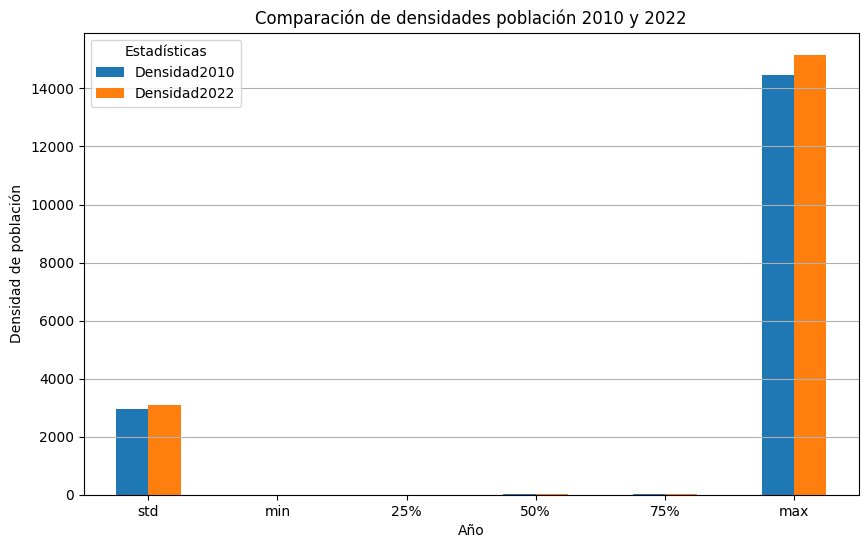

In [ ]:
# Crear el gráfico de barras exploratorio

densidades.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de densidades población 2010 y 2022')
plt.xlabel('Año')
plt.ylabel('Densidad de población')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor claridad
plt.legend(title='Estadísticas')
plt.grid(axis='y')  # Agregar rejilla en el eje y para mayor claridad
plt.show()

La std del 2022 es ligeramente mayor que en 2010. Lo que indica una mayor variabilidad en la densidad de población del 2022 comparada al 2010.

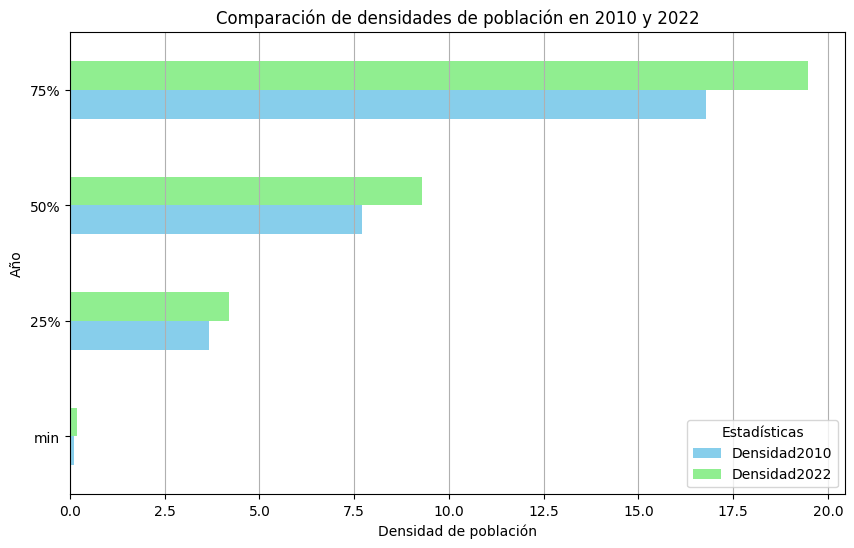

In [ ]:
# Seleccionar sin max
densidades_1 = summary_dens.loc[['min', '25%', '50%', '75%']]

densidades_1.plot(kind='barh', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Comparación de densidades de población en 2010 y 2022')
plt.xlabel('Densidad de población')
plt.ylabel('Año')
plt.yticks(rotation=0)  # Rotar las etiquetas del eje y para mayor claridad
plt.legend(title='Estadísticas')
plt.grid(axis='x')  # Agregar rejilla en el eje x para mayor claridad
plt.show()


Nota: Hay más áreas con densidades de población superiores al 75% de la muestra en comparación con la densidad del 2010.
Esta información puede ser útil para comprender cómo ha evolucionado la distribución de la densidad de población en los dos períodos o categorías y para identificar áreas donde se han producido mayores cambios.

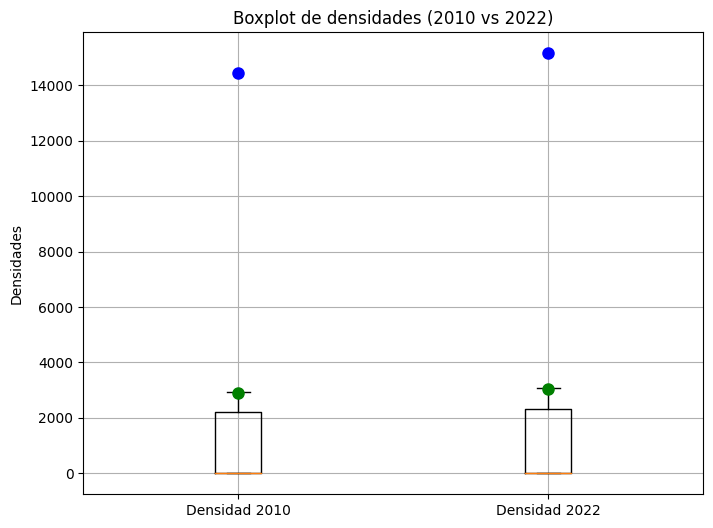

In [ ]:
# Boxplot

plt.figure(figsize=(8, 6))

# grafica
bp = plt.boxplot([densidades["Densidad2010"], densidades["Densidad2022"]], labels=["Densidad 2010", "Densidad 2022"])

plt.plot([1, 2], [densidades.max()["Densidad2010"], densidades.max()["Densidad2022"]], marker='o', color='blue', markersize=8, linestyle='None') # Marcamos las max con dif color.

plt.plot([1, 2], [densidades.mean()["Densidad2010"], densidades.mean()["Densidad2022"]], marker='o', color='green', markersize=8, linestyle='None') # Mean color

plt.title('Boxplot de densidades (2010 vs 2022)')
plt.ylabel('Densidades')
plt.grid(True)
plt.show()

Nota: Valores atípicos extremos diferentes de la mayoría. Areas extremadamente altas o bajas en comparación al resto.

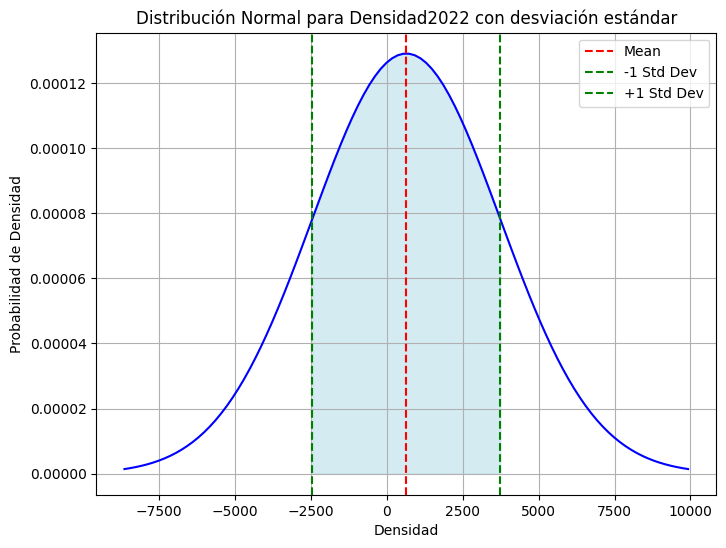

In [ ]:
# Grafico disitribucion normal.

# Mean  y  desviación estándar,  Densidad2022
mean_dens2022 = 646.991667
std_dens2022 = 3091.590557

# Generando los datos para distribución normal
x = np.linspace(mean_dens2022 - 3*std_dens2022, mean_dens2022 + 3*std_dens2022, 100)
y = (1/(std_dens2022 * np.sqrt(2 * np.pi))) * np.exp(-((x - mean_dens2022) ** 2) / (2 * std_dens2022 ** 2))

# Grafica
plt.figure(figsize=(8, 6))
sns.lineplot(x=x, y=y, color='blue')

# Señalamos con color mean con color rojo
plt.axvline(x=mean_dens2022, color='red', linestyle='--', label='Mean')

# Marcamos ±1 desviación estándar con color verde
plt.axvline(x=mean_dens2022 - std_dens2022, color='green', linestyle='--', label='-1 Std Dev')
plt.axvline(x=mean_dens2022 + std_dens2022, color='green', linestyle='--', label='+1 Std Dev')

# Relleno entre ±1 desviación estándar con color azul claro.
plt.fill_between(x, y, where=(x >= mean_dens2022 - std_dens2022) & (x <= mean_dens2022 + std_dens2022), color='lightblue', alpha=0.5)

plt.title('Distribución Normal para Densidad2022 con desviación estándar')
plt.xlabel('Densidad')
plt.ylabel('Probabilidad de Densidad')
plt.legend()
plt.grid(True)
plt.show()

Nota:  Es una representación visual útil para comprender la probabilidad de diferentes valores de densidad de población en el año 2022.
- los datos están muy dispersos y hay una amplia variabilidad en la densidad de población.
. la forma es simétrica. La mayoria de los datos se concentran cerca de la media y disminuyen a medida que nos alejamos de ella en ambas direcciones.

##TRANSFORMACION DE DATOS
### Voy a trabajar con los datos de densidad 2022:Categorías

In [ ]:
# Creamos variables que dividan las densidades por grupos que contengan rangos de densidades

arg_final['clasif_dens_2022'] = pd.cut(arg_final['Densidad2022'],
                                            bins=[-np.inf, 10, 20, 30, np.inf],
                                            labels=['menos_diez hab/km2', 'entre_10y20 hab/km2',
                                                    'entre_20y30 hab/km2', 'mas_30 hab/km2'])


In [ ]:
# Mas categorias

sur = provincias_arg[provincias_arg['Jurisdiccion'].isin(['La Pampa', 'Santa Cruz', 'San Luis', 'Chubut', 'Neuquén', 'Río Negro',
                                                          'San Juan', 'Mendoza', 'Tierra_delFuego'])]

norte = provincias_arg[provincias_arg['Jurisdiccion'].isin(['CABA', 'Tucumán', 'Buenos Aires',
                                                            'Misiones', 'Santa Fe', 'Córdoba', 'Entre Ríos', 'Jujuy',
                                                            'Corrientes', 'Chaco', 'Salta', 'Formosa', 'Santiago del Estero',
                                                            'Catamarca', 'La Rioja'])]


In [ ]:
# Comparación Estadística
# Resumenes estadisticos Densidad 2010

#summary_dens = arg_final[['Densidad2010', 'Densidad2022']].describe()
#print(summary_dens)

summary_norte = norte['Densidad2022'].describe()
summary_norte


count    14.000000
mean     22.742857
std      21.709860
min       4.200000
25%       8.325000
50%      14.400000
75%      25.775000
max      76.700000
Name: Densidad2022, dtype: float64

In [ ]:
summary_sur= sur['Densidad2022'].describe()
summary_sur


count     8.000000
mean      5.987500
std       4.211019
min       1.400000
25%       2.575000
50%       5.450000
75%       7.950000
max      13.700000
Name: Densidad2022, dtype: float64

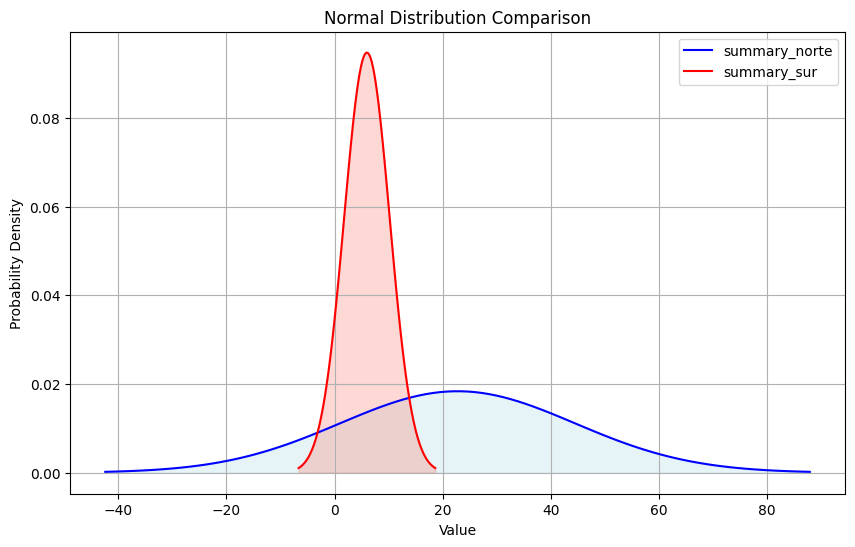

In [ ]:
# Mean y standard deviation para summary_norte
mean_norte = 22.742857
std_norte = 21.709860

# Mean y standard deviation para summary_sur
mean_sur = 5.987500
std_sur = 4.211019

# Generamos data points para la distribución normal de summary_norte
x_norte = np.linspace(mean_norte - 3*std_norte, mean_norte + 3*std_norte, 100)
y_norte = (1/(std_norte * np.sqrt(2 * np.pi))) * np.exp(-((x_norte - mean_norte) ** 2) / (2 * std_norte ** 2))

# Generamos data points para la distribución normal de  summary_sur
x_sur = np.linspace(mean_sur - 3*std_sur, mean_sur + 3*std_sur, 100)
y_sur = (1/(std_sur * np.sqrt(2 * np.pi))) * np.exp(-((x_sur - mean_sur) ** 2) / (2 * std_sur ** 2))

# Plot para distribución normal
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_norte, y=y_norte, color='blue', label='summary_norte')
sns.lineplot(x=x_sur, y=y_sur, color='red', label='summary_sur')
plt.fill_between(x_norte, y_norte, color='lightblue', alpha=0.3)
plt.fill_between(x_sur, y_sur, color='salmon', alpha=0.3)
plt.title('Normal Distribution Comparison')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

NOTA: La curva azul (summary_norte) La distribución norte tiene una mayor densidad de población más cerca de su media y que la densidad de población en el norte tiende a variar menos que en el sur. Por otro lado, la distribución sur parece tener una mayor variabilidad en la densidad de población y una distribución más dispersa alrededor de su media.

VISUALIZACION

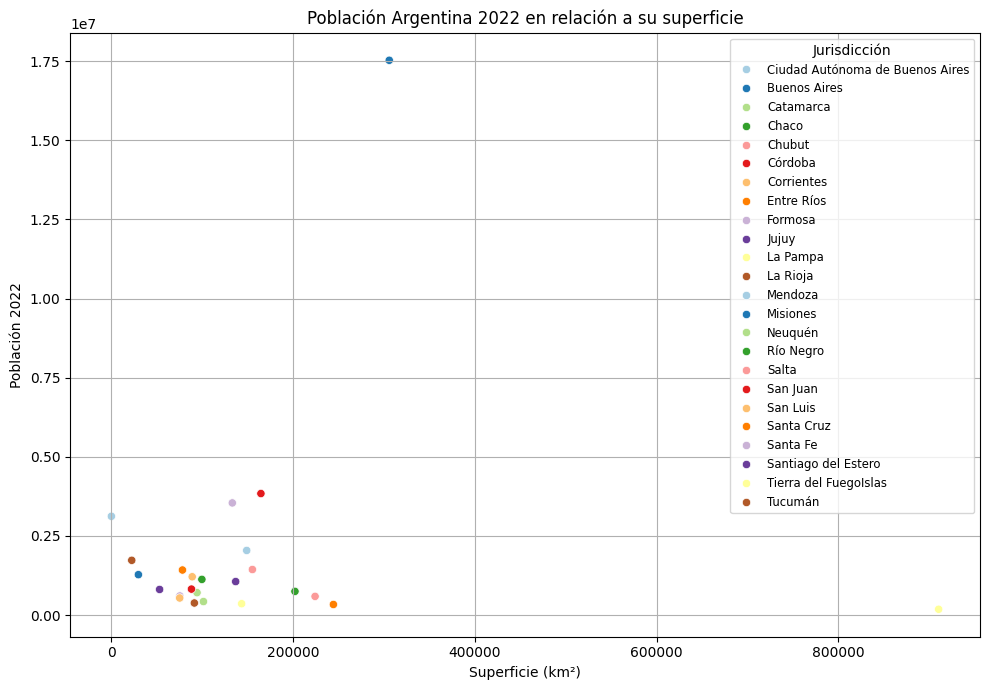

In [ ]:
# Dispersión

plt.figure(figsize=(10, 7))
sns.scatterplot(data=provincias_arg, x='Superficie', y='Poblacion2022', hue='Jurisdiccion', palette='Paired', legend='full')
plt.title('Población Argentina 2022 en relación a su superficie')
plt.xlabel('Superficie (km²)')
plt.ylabel('Población 2022')
plt.grid(True)
plt.legend(title='Jurisdicción', fontsize='small')
plt.tight_layout()
plt.savefig('grafico1Poblaciondensidad.png')
plt.show()

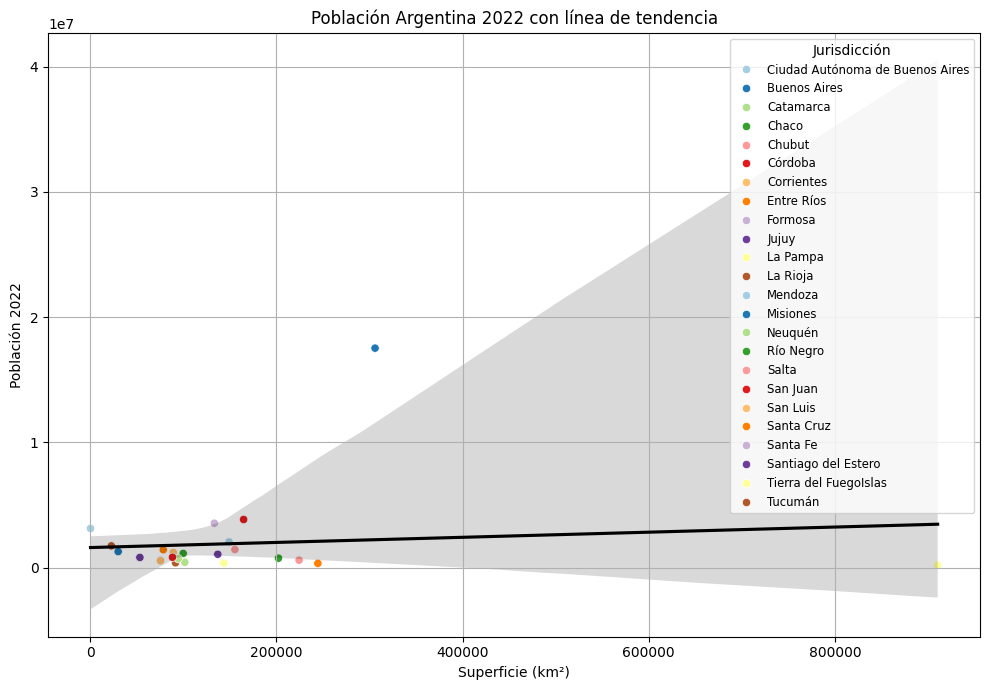

In [ ]:
# Dispersión con linea de tendencia

plt.figure(figsize=(10, 7))
sns.scatterplot(data=provincias_arg, x='Superficie', y='Poblacion2022', hue='Jurisdiccion', palette='Paired', legend='full')
sns.regplot(data=provincias_arg, x='Superficie', y='Poblacion2022', scatter=False, color='black')
plt.title('Población Argentina 2022 con línea de tendencia')
plt.xlabel('Superficie (km²)')
plt.ylabel('Población 2022')
plt.grid(True)
plt.legend(title='Jurisdicción', fontsize='small')
plt.tight_layout()
plt.savefig('grafico2Poblaciondensidad.png')
plt.show()

Nota: La línea de tendencia muestra la tendencia general en los datos y puede utilizarse para predecir el valor de una variable (en este caso, 'Poblacion2022') en función de otra variable (en este caso, 'Superficie')
Se calcula utilizando un método estadístico como la regresión lineal para encontrar la mejor linea que se ajusta a los puntos en el gráfico.

EJERCICIOS:


EJERCICIOS:

1.- Observa la gráfica inferior con la gráfica de dispersión ( sin linea de tendencia)  qué cambios notas.
2.- Vuelve a mirar ahora el código y trata de ubicar dónde está el cambio.
3.- Modifica el tamaño de los puntos que se visualizan en la gráfica.

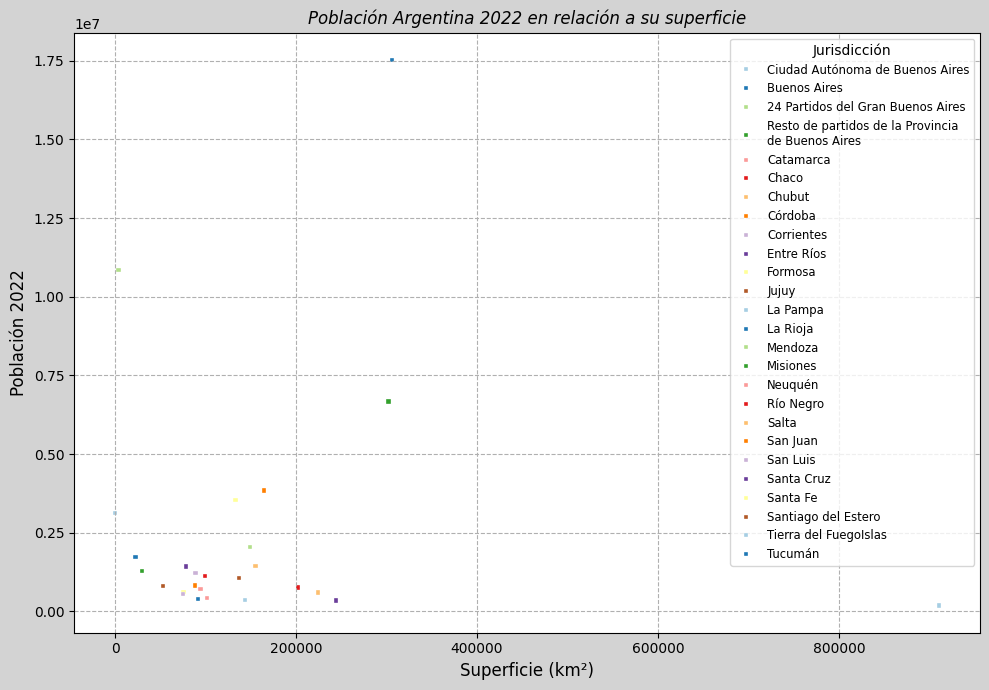

In [ ]:
#GRAFICA DE EJERCICIO:


plt.figure(figsize=(10, 7), facecolor='lightgray')
sns.scatterplot(data=provincias_arg, x='Superficie', y='Poblacion2022', hue='Jurisdiccion', palette='Paired', legend='full', marker='s', s=10)
plt.title('Población Argentina 2022 en relación a su superficie', fontsize=12, fontstyle='italic')
plt.xlabel('Superficie (km²)', fontsize=12)
plt.ylabel('Población 2022', fontsize=12)
plt.grid(True, linestyle='--')
plt.legend(title='Jurisdicción', fontsize='small')
plt.tight_layout()
plt.savefig('grafico1Poblaciondensidad.png')
plt.show()
